In [25]:
# Stephen.Griffies@noaa.gov 

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
from xgcm import Grid
import numpy as np
import seaborn as sns
import pandas as pd
import cmocean
from mpl_toolkits.axes_grid1 import make_axes_locatable
from glob import glob 
import mplsettings


import cartopy.crs as ccrs

%matplotlib inline

In [27]:
# static file 

#fname25_static = "/net/smg/OWG/CM4_highres/grids/p25/ocean_annual.static.nc"
fname25_static = "../../common/CM4X_p25/ocean_annual.static.nc"
static25       = xr.open_mfdataset(fname25_static)

#fname125_static = "/net/smg/OWG/CM4_highres/grids/p125/ocean_annual.static.nc"
fname125_static = "../../common/CM4X_p125/ocean_annual.static.nc"
static125       = xr.open_mfdataset(fname125_static)

In [28]:
ds4p0 = xr.open_mfdataset('CM4p0_SST_bias_NOAA_OI.nc')
ds4p0 = ds4p0.rename_vars({"__xarray_dataarray_variable__": "sst4p0_bias"})
sst4p0_bias = ds4p0['sst4p0_bias']

ds25  = xr.open_mfdataset('CM4Xp25_SST_bias_NOAA_OI.nc')
ds25  = ds25.rename_vars({"__xarray_dataarray_variable__": "sst25_bias"})
sst25_bias = ds25['sst25_bias']

ds125 = xr.open_mfdataset('CM4Xp125_SST_bias_NOAA_OI.nc')
ds125 = ds125.rename_vars({"__xarray_dataarray_variable__": "sst125_bias"})
sst125_bias = ds125['sst125_bias']

In [29]:
area25 = static25['areacello'] * static25['wet']
total_ocean_area25 = area25.sum(dim=('xh', 'yh'))

area125 = static125['areacello'] * static125['wet']
total_ocean_area125 = area125.sum(dim=('xh', 'yh'))

In [30]:
sst25_bias_mean = (sst25_bias * area25).sum(dim=('xh', 'yh')) / total_ocean_area25
sst25_bias_sq   = sst25_bias*sst25_bias
sst25_sigma     = np.sqrt( (sst25_bias_sq * area25).sum(dim=('xh', 'yh')) / total_ocean_area25 )
sst25_bias_max  = np.max(sst25_bias)
sst25_bias_min  = np.min(sst25_bias)

print('sst25_bias_mean (deg C) = ',sst25_bias_mean.values,'  and sst25_sigma (deg C)    = ',sst25_sigma.values)
print('sst25_bias_max  (deg C) = ',sst25_bias_max.values,'   and sst25_bias_min (deg C) = ',sst25_bias_min.values)

sst25_bias_mean (deg C) =  -0.5101401563666602   and sst25_sigma (deg C)    =  0.9185906287784844
sst25_bias_max  (deg C) =  5.797921337951063    and sst25_bias_min (deg C) =  -7.579083040324978


In [31]:
sst125_bias_mean = (sst125_bias * area125).sum(dim=('xh', 'yh')) / total_ocean_area125
sst125_bias_sq   = sst125_bias*sst125_bias
sst125_sigma     = np.sqrt( (sst125_bias_sq * area125).sum(dim=('xh', 'yh')) / total_ocean_area125 )
sst125_bias_max  = np.max(sst125_bias)
sst125_bias_min  = np.min(sst125_bias)

print('sst125_bias_mean (deg C) = ',sst125_bias_mean.values,'  and sst125_sigma (deg C)    = ',sst125_sigma.values)
print('sst125_bias_max  (deg C) = ',sst125_bias_max.values,'   and sst125_bias_min (deg C) = ',sst125_bias_min.values)

sst125_bias_mean (deg C) =  -0.29464179186354805   and sst125_sigma (deg C)    =  0.7304573952150305
sst125_bias_max  (deg C) =  6.060700854543416    and sst125_bias_min (deg C) =  -6.587938864319799


In [32]:
sst4p0_bias_mean = (sst4p0_bias * area25).sum(dim=('xh', 'yh')) / total_ocean_area25
sst4p0_bias_sq   = sst4p0_bias*sst4p0_bias
sst4p0_sigma     = np.sqrt( (sst4p0_bias_sq * area25).sum(dim=('xh', 'yh')) / total_ocean_area25)
sst4p0_bias_max  = np.max(sst4p0_bias)
sst4p0_bias_min  = np.min(sst4p0_bias)

print('sst4p0_bias_mean (deg C) = ',sst4p0_bias_mean.values,'  and sst40_sigma (deg C)    = ',sst4p0_sigma.values)
print('sst4p0_bias_max  (deg C) = ',sst4p0_bias_max.values,'   and sst40_bias_min (deg C) = ',sst4p0_bias_min.values)

sst4p0_bias_mean (deg C) =  -0.4778100098772313   and sst40_sigma (deg C)    =  0.8957483779324557
sst4p0_bias_max  (deg C) =  7.47039578607124    and sst40_bias_min (deg C) =  -7.402521265138411


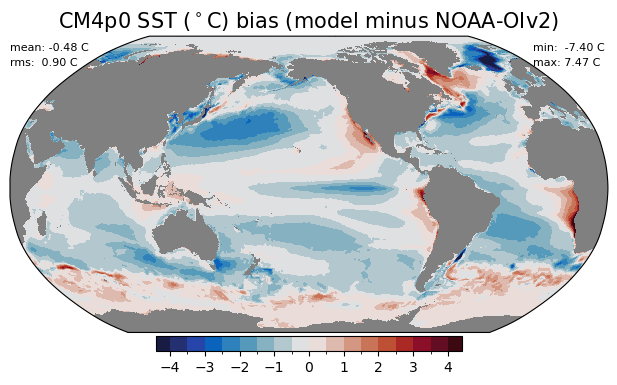

In [33]:
field = sst4p0_bias 
vmin=-4
vmax=4
levels = [-4, -3.5, -3, -2.5, -2, -1.5, -1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="lon", y="lat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4p0 SST ($^\circ$C) bias (model minus NOAA-OIv2)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')

axis.text(.0,.95, f'mean: {sst4p0_bias_mean.values:.2f} C',  fontsize=8, transform=axis.transAxes)
axis.text(.0,.90, f'rms:  {sst4p0_sigma.values:.2f} C',      fontsize=8, transform=axis.transAxes)
axis.text(.875,.90, f'max: {sst4p0_bias_max.values:.2f} C',   fontsize=8, transform=axis.transAxes)
axis.text(.875,.95, f'min:  {sst4p0_bias_min.values:.2f} C',  fontsize=8, transform=axis.transAxes)
#axis.text(.20,.01, 'For years 1941-1970',        fontsize=20, transform=axis.transAxes)
   
plt.tight_layout()
plt.show()
fig.savefig('Fig14_CM4p0_SST_bias_NOAA_OI.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)

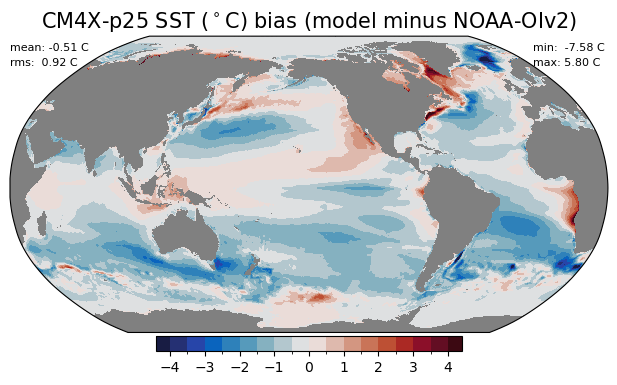

In [34]:
field = sst25_bias 
vmin=-4
vmax=4
levels = [-4, -3.5, -3, -2.5, -2, -1.5, -1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="lon", y="lat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4X-p25 SST ($^\circ$C) bias (model minus NOAA-OIv2)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')

axis.text(.0,.95, f'mean: {sst25_bias_mean.values:.2f} C',  fontsize=8, transform=axis.transAxes)
axis.text(.0,.90, f'rms:  {sst25_sigma.values:.2f} C',      fontsize=8, transform=axis.transAxes)
axis.text(.875,.90, f'max: {sst25_bias_max.values:.2f} C',   fontsize=8, transform=axis.transAxes)
axis.text(.875,.95, f'min:  {sst25_bias_min.values:.2f} C',  fontsize=8, transform=axis.transAxes)
#axis.text(.20,.01, 'For years 1941-1970',        fontsize=20, transform=axis.transAxes)
   
plt.tight_layout()
plt.show()
fig.savefig('Fig14_CM4Xp25_SST_bias_NOAA_OI.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)

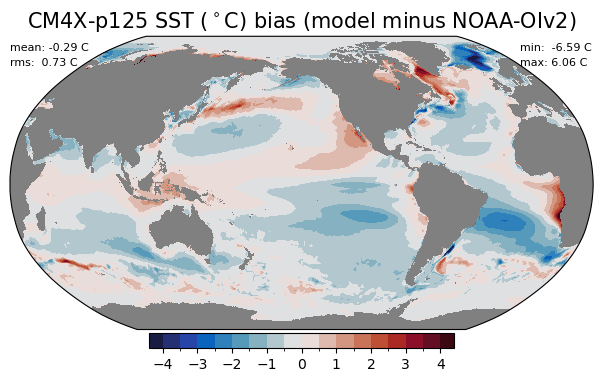

In [35]:
field = sst125_bias 
vmin=-4
vmax=4
levels = [-4, -3.5, -3, -2.5, -2, -1.5, -1, -.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(6.5,4.0),
             subplot_kw={'projection': ccrs.Robinson(central_longitude=-150)})

p=xr.plot.pcolormesh(field, ax=axis, x="lon", y="lat",
#                     vmin=vmin, vmax=vmax,
                     transform=ccrs.PlateCarree(), 
#                     cmap='RdYlBu_r',
#                     cmap=cmocean.cm.deep_r,
#                     cmap=cmocean.cm.dense,
                     cmap=cmocean.cm.balance,
                     add_colorbar=False,
                     levels=levels,
            )
#axs.gridlines()
plt.gca().set_facecolor('gray')
plt.tick_params(labelsize=20) 
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title(r'CM4X-p125 SST ($^\circ$C) bias (model minus NOAA-OIv2)', fontsize=15)
cbar = plt.colorbar(p,pad=0.01,spacing='uniform', 
                    extend='both', 
                    extendrect=True, shrink=0.5,orientation='horizontal')

axis.text(.0,.95, f'mean: {sst125_bias_mean.values:.2f} C',  fontsize=8, transform=axis.transAxes)
axis.text(.0,.90, f'rms:  {sst125_sigma.values:.2f} C',      fontsize=8, transform=axis.transAxes)
axis.text(.875,.90, f'max: {sst125_bias_max.values:.2f} C',   fontsize=8, transform=axis.transAxes)
axis.text(.875,.95, f'min:  {sst125_bias_min.values:.2f} C',  fontsize=8, transform=axis.transAxes)
#axis.text(.20,.01, 'For years 1941-1970',        fontsize=20, transform=axis.transAxes)
   
plt.tight_layout()
plt.show()
fig.savefig('Fig14_CM4Xp125_SST_bias_NOAA_OI.jpg', format = 'jpeg', bbox_inches='tight', dpi=400)